<a href="https://colab.research.google.com/github/tylerheadley/lesson-data-analysis/blob/main/SwimLessonData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Swim Lesson Data Analysis

### Author: Tyler Headley

In this notebook, I analyze data from the South Orange Community Pool Swim Lesson Program from the summer of 2023. As the director of this program last summer, I was able to export this data through our recreation management software, CivicRec. I use this data to gain business insights for potential areas to increase revenue in the future.

In [ ]:
!pip install meteostat

# Step 1: Data Acquisition

I begin by exporting the data from CivicRec, selecting the desired fields for lessons taught over the course of summer 2023. I collected data for both private and group swim lessons. After exporting the data to a csv file format, it is easy to read it into a Pandas dataframe.

In [4]:
import pandas as pd

private_df = pd.read_csv("https://raw.githubusercontent.com/tylerheadley/lesson-data-analysis/main/private_lesson_data.csv", header=1)
group_df = pd.read_csv("https://raw.githubusercontent.com/tylerheadley/lesson-data-analysis/main/group_lesson_data.csv", header=1)

print(private_df.shape)
print(group_df.shape)

(1231, 18)
(77, 14)


In [5]:
private_df.head()

,Location,Facility,Start Date,Start Time,End Time,User,Age,Gender,Swim Lessons: 11SC Agreement,Swim Lessons: 11SC comp swimmer,Swim Lessons: Accommodations,Swim Lessons: Additional Comments,Swim Lessons: Agreement (leveling info),Swim Lessons: Email,Swim Lessons: Goals (11SC),Swim Lessons: Level,Swim Lessons: Swimmer's Age,Swim Lessons: Swimmer's Name
0,1:1 Swim Coaching,Aidan Dwyer,07/05/2023,03:00 PM,03:30 PM,Shantheri Shenoy,40,NaN,Agreed,Agreed,no,NaN,NaN,drshantheris@gmail.com,Free style,NaN,39,Shantheri Shenoy
1,1:1 Swim Coaching,Aidan Dwyer,07/07/2023,04:00 PM,04:30 PM,Shantheri Shenoy,40,NaN,Agreed,Agreed,none,NaN,NaN,drshantheris@gmail.com,beginner lessons,NaN,39,Shantheri Shenoy
2,1:1 Swim Coaching,Aidan Dwyer,07/12/2023,05:00 PM,05:30 PM,Yuval Dagan,38,NaN,Agreed,Agreed,No,NaN,NaN,yuvaldagan4@gmail.com,Starting to learn how to swim,NaN,5,Abigail Dagan
3,1:1 Swim Coaching,Aidan Dwyer,07/12/2023,06:30 PM,07:00 PM,Arlaina Tibensky,51,NaN,Agreed,Agreed,NaN,Arthur needs help with diving!,NaN,mermaidrage@gmail.com,A better start,NaN,13,Arthur Edgar
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
group_df.head()

,Activity,Session,Min Participants,Max Participants,Transferred In,Refunded,Removed,Transferred Out,Participants,Waiting List,Start Date,Start Time,End Date,End Time
0,Group Swim Lessons,1- Stingray 2023,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,07/10/2023,05:00 PM,07/13/2023,05:30 PM
1,Group Swim Lessons,1a- Goldfish 2023,2.0,4.0,0.0,0.0,0.0,0.0,4.0,2.0,07/10/2023,01:30 PM,07/13/2023,02:00 PM
2,Group Swim Lessons,1a- Guppy 2023,2.0,4.0,0.0,1.0,0.0,0.0,4.0,9.0,07/10/2023,01:30 PM,07/13/2023,02:00 PM
3,Group Swim Lessons,1a- Guppy 2023 (Duplicated),2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,07/10/2023,01:30 PM,07/13/2023,02:00 PM
4,Group Swim Lessons,1a- Guppy 2023 (Duplicated),2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,07/10/2023,01:30 PM,07/13/2023,02:00 PM


# Step 2: Data Cleaning

Next, I prepare the data for analysis by cleaning and preprocessing both dataframes.

### Cleaning Private Lesson Data

Most accounts do not have gender information, so we will drop that column. We don't care about the age of the parent who purchased the lesson, so we drop that column as well. We can also drop the agreements required for signup.

In [7]:
private_df = private_df.drop(columns=["Gender", "Age", "Swim Lessons: 11SC Agreement", "Swim Lessons: 11SC comp swimmer", "Swim Lessons: Agreement (leveling info)"])

In [8]:
private_df = private_df.dropna(subset=['Facility'])

In [9]:
def fill_swimmer_last_name(row):
    name_parts = row["Swim Lessons: Swimmer's Name"].split()
    if len(name_parts) == 1:  # If there's only one word in the name
        return f"{name_parts[0]} {row['User'].split()[-1]}"  # Assume last name is the same as in 'user' column
    return row["Swim Lessons: Swimmer's Name"]  # If full name is already provided, return it as is

private_df["Swim Lessons: Swimmer's Name"] = private_df.apply(fill_swimmer_last_name, axis=1)

In [10]:
private_coaching_df = private_df[private_df['Location'] == "1:1 Swim Coaching"]
private_df = private_df[private_df['Location'] == "Swim Instructors"]

In [11]:
private_coaching_df = private_coaching_df.drop(columns=["Swim Lessons: Level", "Location"])

In [12]:
private_df = private_df.drop(columns=["Swim Lessons: Goals (11SC)", "Location"])

# Step 3: Analysis

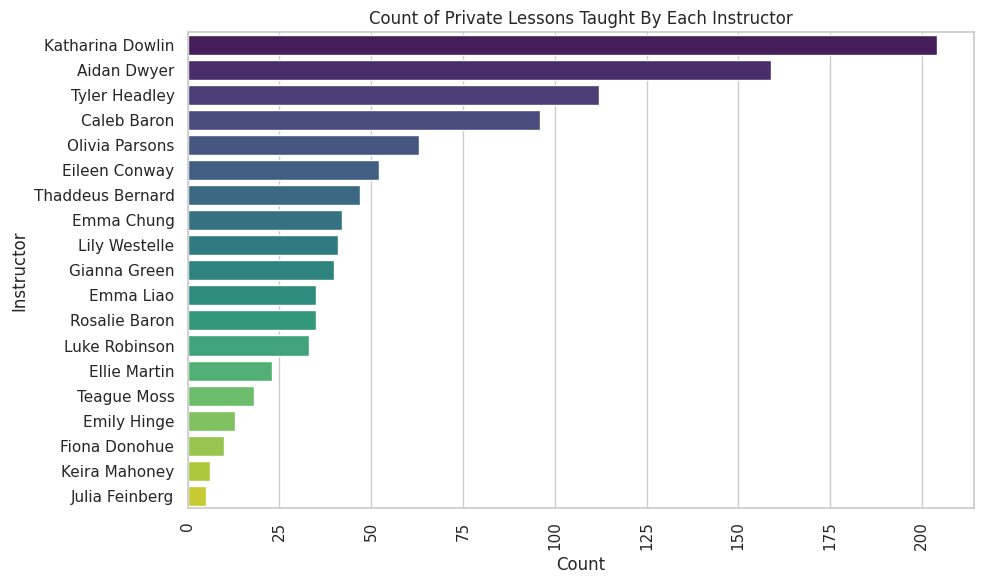

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Facility' and count the number of occurrences
facility_counts = private_df['Facility'].value_counts().reset_index()
facility_counts.columns = ['Facility', 'Count']

# Create a barplot using seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Facility', hue='Facility', data=facility_counts, palette='viridis', orient='h', legend=False)

plt.title('Count of Private Lessons Taught By Each Instructor')
plt.xlabel('Count')
plt.ylabel('Instructor')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

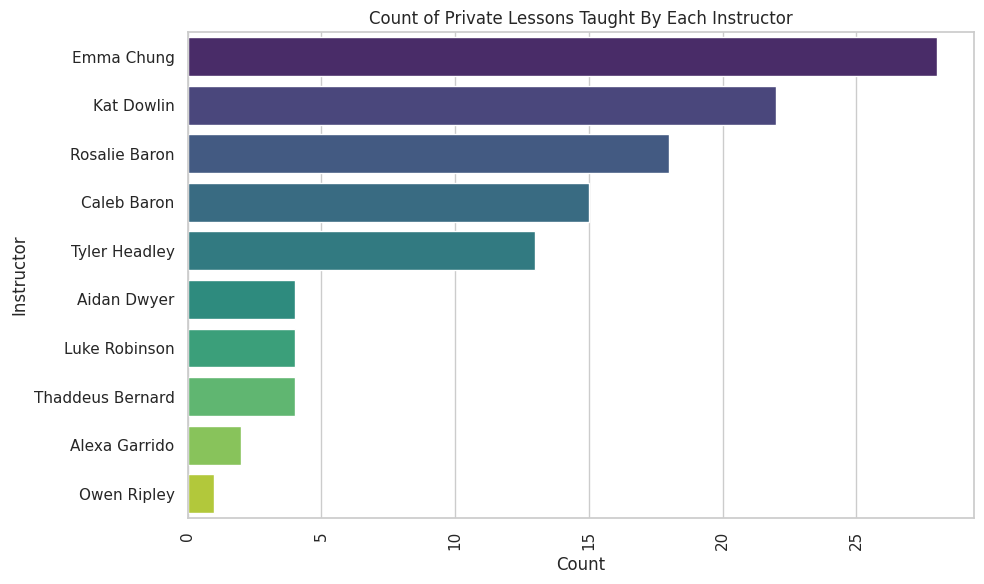

In [14]:
# Group by 'Facility' and count the number of occurrences
facility_11SC_counts = private_coaching_df['Facility'].value_counts().reset_index()
facility_11SC_counts.columns = ['Facility', 'Count']

# Create a barplot using seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Facility', hue='Facility', data=facility_11SC_counts, palette='viridis', orient='h', legend=False)

plt.title('Count of Private Lessons Taught By Each Instructor')
plt.xlabel('Count')
plt.ylabel('Instructor')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

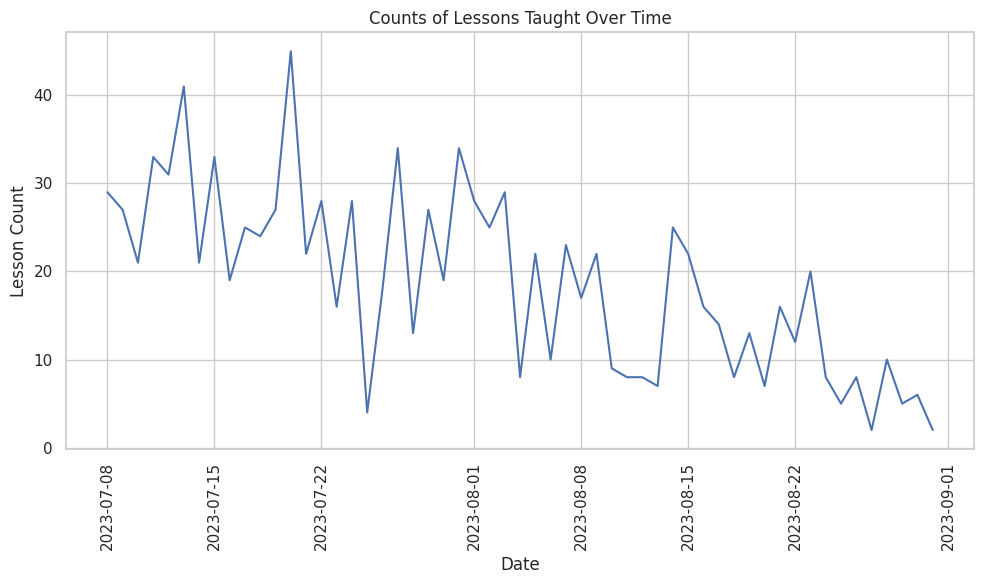

In [15]:
private_df['Start Date'] = pd.to_datetime(private_df['Start Date'])

# Group by 'Start Date' and count the number of lessons taught on each date
lesson_counts = private_df.groupby('Start Date').size().reset_index(name='Count')

# Create time series plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start Date', y='Count', data=lesson_counts)
plt.title('Counts of Lessons Taught Over Time')
plt.xlabel('Date')
plt.ylabel('Lesson Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-16-da7090322f33>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of Week', y='Count', data=lesson_counts, order=order, palette='magma')


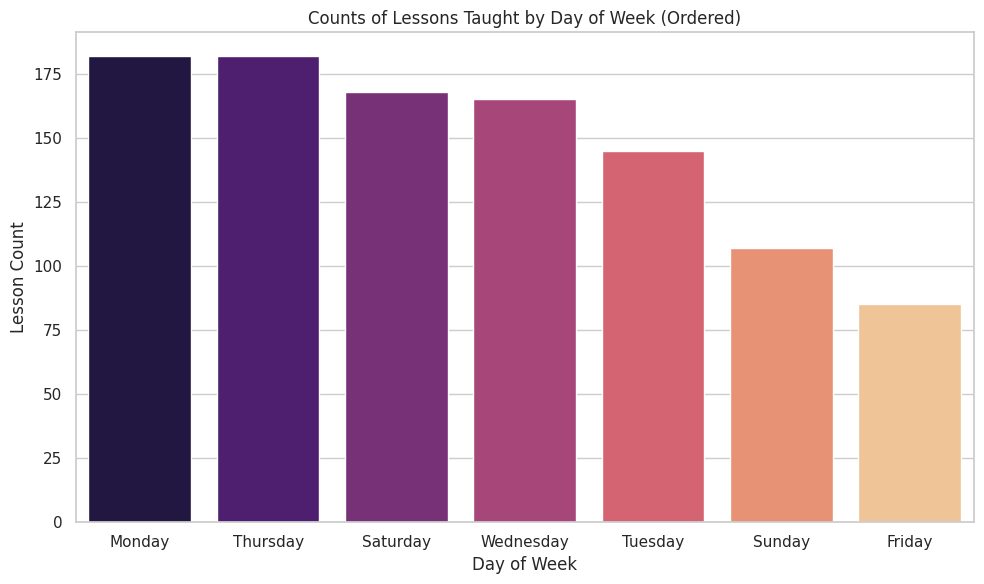

In [16]:
# Extract day of the week and map it to its name
private_df['Day of Week'] = private_df['Start Date'].dt.day_name()

# Group by 'Day of Week' and count the number of lessons taught on each day
lesson_counts = private_df.groupby('Day of Week').size().reset_index(name='Count')

# Order the days of the week by count in descending order
order = lesson_counts.sort_values(by='Count', ascending=False)['Day of Week']

# Create barplot using Seaborn with a different color palette and ordered bars
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of Week', y='Count', data=lesson_counts, order=order, palette='magma')
plt.title('Counts of Lessons Taught by Day of Week (Ordered)')
plt.xlabel('Day of Week')
plt.ylabel('Lesson Count')
plt.tight_layout()
plt.show()


In [ ]:
from meteostat import Point, Hourly
from datetime import datetime

# Define the location (South Orange, NJ) and date range
location = Point(40.749081, -74.260300)  # Latitude and longitude for South Orange, NJ
start = datetime(2023, 7, 1)
end = datetime(2023, 8, 31)

# Retrieve historical weather data for South Orange, NJ
data = Hourly(location, start, end)
weather_df = data.fetch()

weather_df = weather_df.drop()

# plt.plot()

# # Plot time vs. coco
# plt.figure(figsize=(10, 6))
# plt.plot(df['time'], df['coco'], marker='o', linestyle='-')
# plt.title('Time vs. Coco')
# plt.xlabel('Time')
# plt.ylabel('Coco')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2023-07-01 00:00:00,25.6,14.4,50.0,0.0,NaN,180.0,5.4,NaN,1017.5,NaN,2.0
2023-07-01 01:00:00,23.9,14.3,55.0,0.0,NaN,0.0,0.0,NaN,1018.3,NaN,1.0
2023-07-01 02:00:00,23.3,14.3,57.0,0.0,NaN,0.0,0.0,NaN,1018.4,NaN,1.0
2023-07-01 03:00:00,22.2,15.1,64.0,0.0,NaN,0.0,0.0,NaN,1018.2,NaN,1.0
2023-07-01 04:00:00,22.2,15.1,64.0,0.0,NaN,0.0,0.0,NaN,1018.2,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 20:00:00,28.3,13.8,41.0,0.0,NaN,320.0,18.4,NaN,1005.7,NaN,2.0
2023-08-30 21:00:00,28.3,13.8,41.0,0.0,NaN,320.0,18.4,NaN,1005.7,NaN,3.0
2023-08-30 22:00:00,26.1,13.2,45.0,0.0,NaN,320.0,13.0,NaN,1006.8,NaN,3.0


In [ ]:
# prompt: Using dataframe data: plot coco over time

plt.plot(data['time'], data["coco"])


KeyError: 'time'

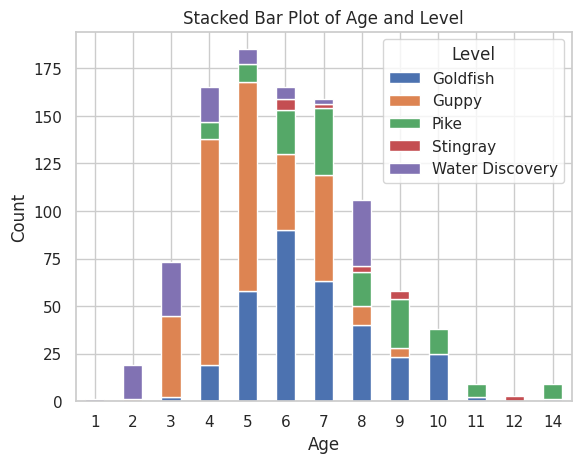

In [18]:
age_col = "Swim Lessons: Swimmer's Age"
level_col = "Swim Lessons: Level"

private_df1 = private_df
# Convert the age column to numeric, forcing non-numeric values to NaN, then drop NaNs
private_df1[age_col] = pd.to_numeric(private_df1[age_col], errors='coerce')

# Filter for ages between 1 and 18
private_df1 = private_df1[(private_df1[age_col] >= 1) & (private_df1[age_col] <= 18)]

# Create a DataFrame to ensure all ages from 1 to 18 are included
age_range = pd.DataFrame({age_col: range(1, 19)})

# Merge with the original DataFrame to ensure all ages are represented
merged_df = age_range.merge(private_df1, on=age_col, how='left')

# Create a crosstab to count the occurrences
crosstab = pd.crosstab(merged_df[age_col], merged_df[level_col])

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Age and Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Level')
plt.xticks(rotation=0)
plt.show()